In [1]:
# import the necessary packages
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull,Delaunay
import cv2
import matplotlib.pyplot as plt
from rdfpy import rdf
from collections import Counter,OrderedDict
%matplotlib notebook

In [ ]:
def generateTriangularLattice(N):
    a = 40*np.array([1,0])
    b = 40*np.array([1/2, np.sqrt(3)/2])
    triangularLattice = np.zeros((N*N,2))
    for i in range(N):
        for j in range(N):
            triangularLattice[N*i+j] = i*a + j*b
    return triangularLattice


<IPython.core.display.Javascript object>


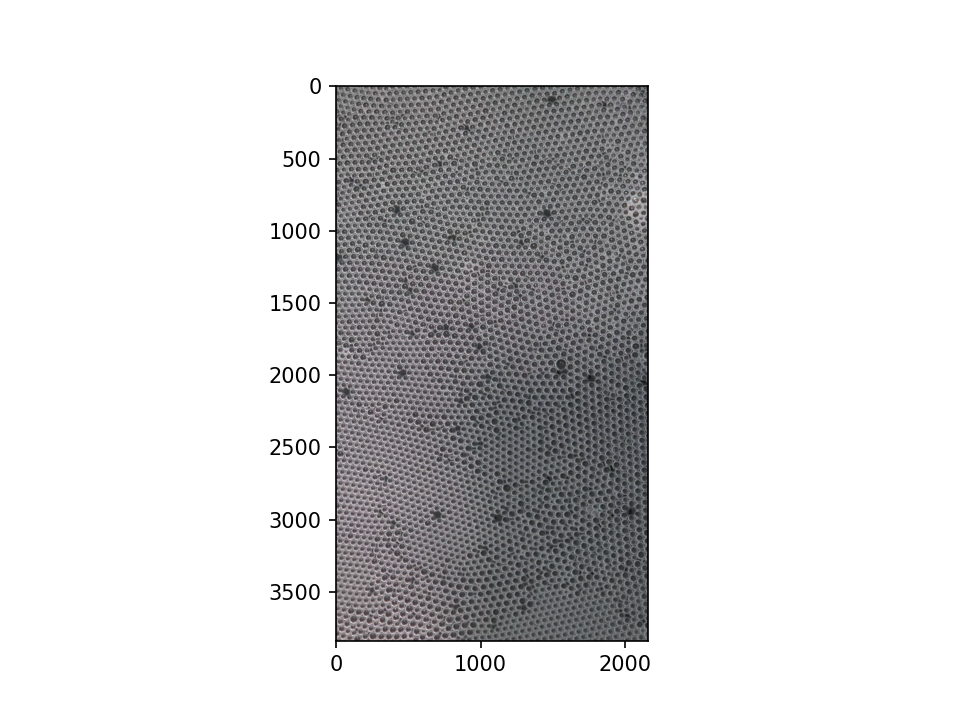

In [116]:
image = cv2.imread('frame30.png')
#image_blur=cv2.GaussianBlur(image, (21,21), cv2.BORDER_DEFAULT)
#image=cv2.bilateralFilter(image,9,150,150)
output1 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray=cv2.GaussianBlur(gray, (101,101), cv2.BORDER_DEFAULT)
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
plt.imshow(image)
plt.show()

<IPython.core.display.Javascript object>


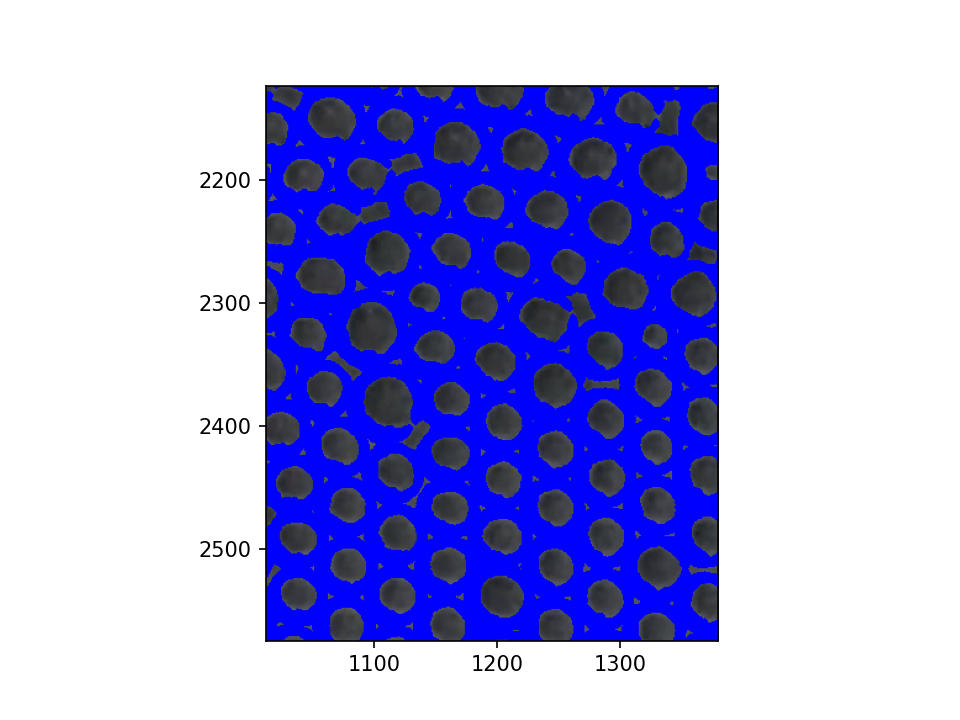

In [114]:
#norm=cv2.normalize(image,None,alpha=1,beta=255,norm_type=cv2.NORM_MINMAX)
contours,hierarchy = cv2.findContours(th,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(image,contours, -1, (0,0,255),1)
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
plt.imshow(CountersImg)
plt.show()

In [112]:
contours

(array([[[ 665, 3835]],
 
        [[ 665, 3836]],
 
        [[ 665, 3837]],
 
        [[ 665, 3838]],
 
        [[ 666, 3839]],
 
        [[ 667, 3839]],
 
        [[ 668, 3838]],
 
        [[ 667, 3837]],
 
        [[ 666, 3837]],
 
        [[ 665, 3836]]], dtype=int32),
 array([[[ 644, 3834]],
 
        [[ 643, 3835]],
 
        [[ 643, 3836]],
 
        [[ 643, 3837]],
 
        [[ 643, 3838]],
 
        [[ 644, 3839]],
 
        [[ 645, 3838]],
 
        [[ 645, 3837]],
 
        [[ 645, 3836]],
 
        [[ 645, 3835]]], dtype=int32),
 array([[[ 552, 3826]],
 
        [[ 552, 3827]],
 
        [[ 552, 3828]],
 
        [[ 553, 3829]],
 
        [[ 554, 3829]],
 
        [[ 554, 3828]],
 
        [[ 554, 3827]],
 
        [[ 554, 3826]],
 
        [[ 553, 3826]]], dtype=int32),
 array([[[1082, 3823]]], dtype=int32),
 array([[[2015, 3821]],
 
        [[2016, 3821]]], dtype=int32),
 array([[[1683, 3820]]], dtype=int32),
 array([[[ 148, 3812]],
 
        [[ 147, 3813]],
 
        [[ 1

<IPython.core.display.Javascript object>


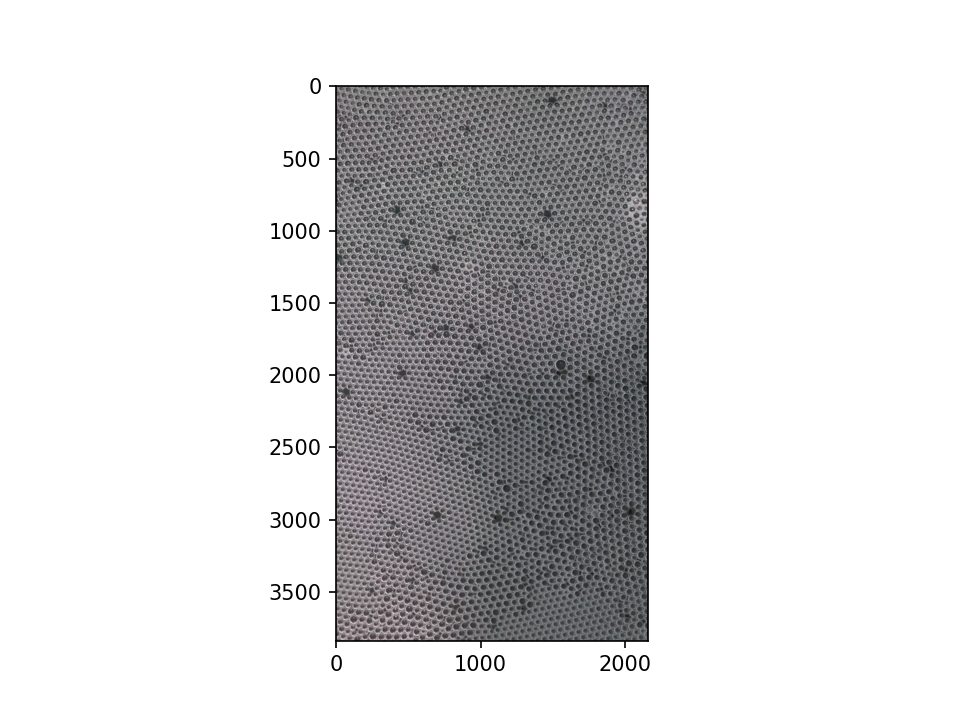

In [30]:
image = cv2.imread('frame180.png')
output1=image.copy()
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray=gray[:,250:]
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
#plt.scatter(centroids[:,0],centroids[:,1],s=0.5,c=psi_T)
#plt.colorbar()
plt.imshow(output1)
plt.show()

<IPython.core.display.Javascript object>


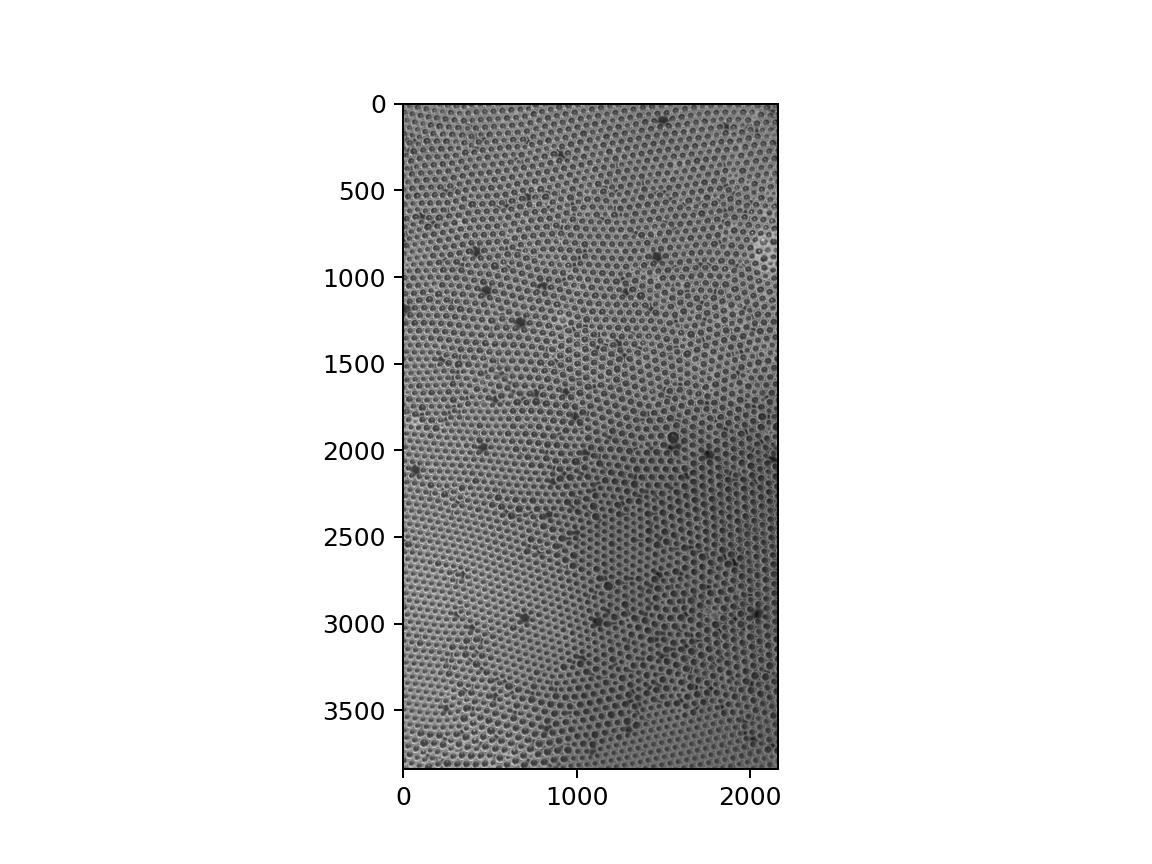

In [51]:
image2 = cv2.imread('oldframe250.png')
output2=image2.copy()
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#gray=gray[:,250:]
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
plt.imshow(output2)
plt.show()

In [ ]:
from scipy.signal import correlate2d
img=correlate2d(gray1,gray2)
plt.figure()
plt.imshow(img)

In [ ]:
gray1=gray[:,250:]

<IPython.core.display.Javascript object>


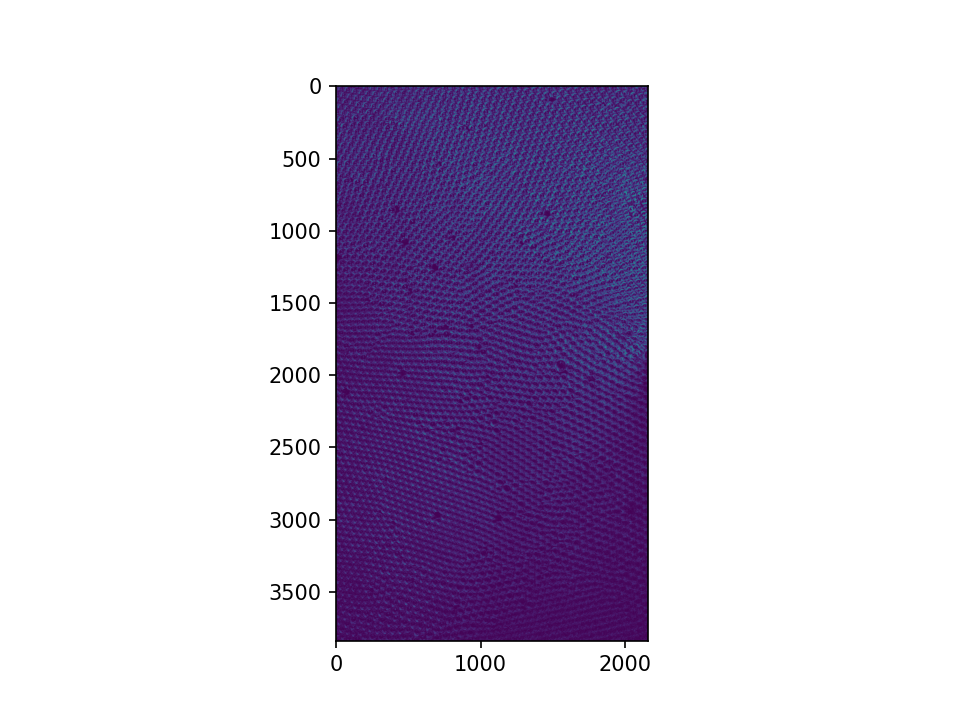

8042227


In [186]:
subtracted=cv2.absdiff(gray1,gray2)
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
plt.imshow(subtracted)
plt.show()
print(np.count_nonzero(subtracted))

<IPython.core.display.Javascript object>


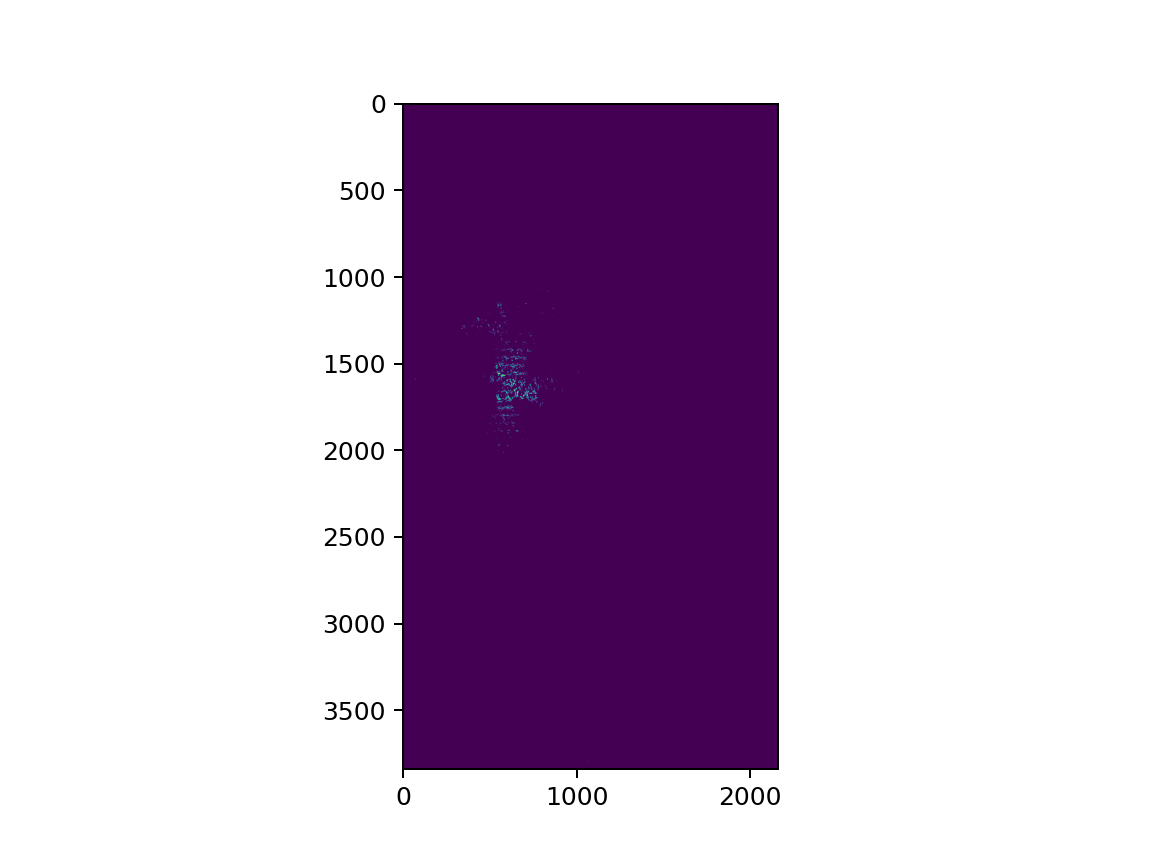

(8023, 1)

In [53]:
def similarity(gray1,gray2):
    th1 = cv2.adaptiveThreshold(gray1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,-10)
    th2 = cv2.adaptiveThreshold(gray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,-10)
    ys=[]
    for shift in range(0,6):
        subtracted=cv2.absdiff(th1,translate(th2,shift))
        ys.append(np.count_nonzero(subtracted))
    sim=min(ys)
    optshift=ys.index(sim)
    img=cv2.absdiff(th1,translate(th2,optshift))
    erode=cv2.erode(img,None,iterations=1)
    sim=np.count_nonzero(erode)
    if sim>0:
        fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
        plt.imshow(erode)
        plt.show()
    return sim,optshift
similarity(gray1,gray2)

In [14]:
def translate(img,x):
    translation_matrix = np.float32([ [1,0,0], [0,1,x] ])   
    img_translation = cv2.warpAffine(img, translation_matrix, (img.shape[1],img.shape[0]))   
    return img_translation

<IPython.core.display.Javascript object>


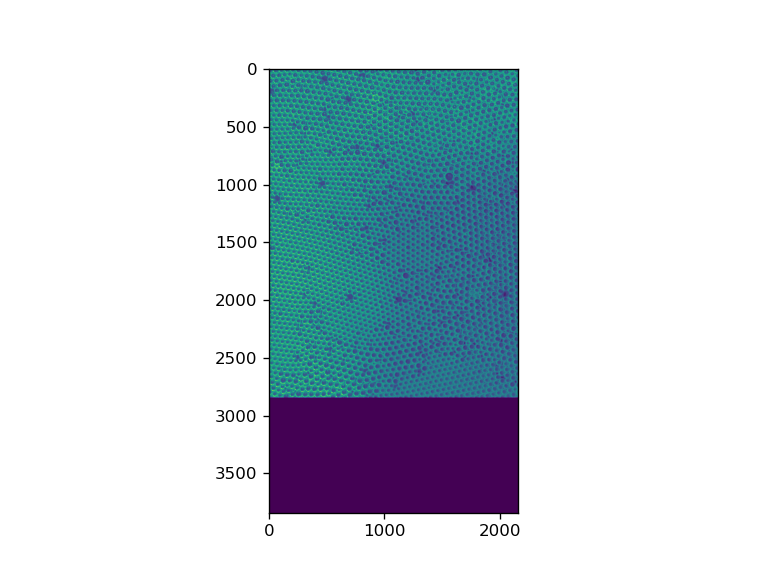

In [19]:
plt.figure()
plt.imshow(translate(gray1,-1000))

<IPython.core.display.Javascript object>


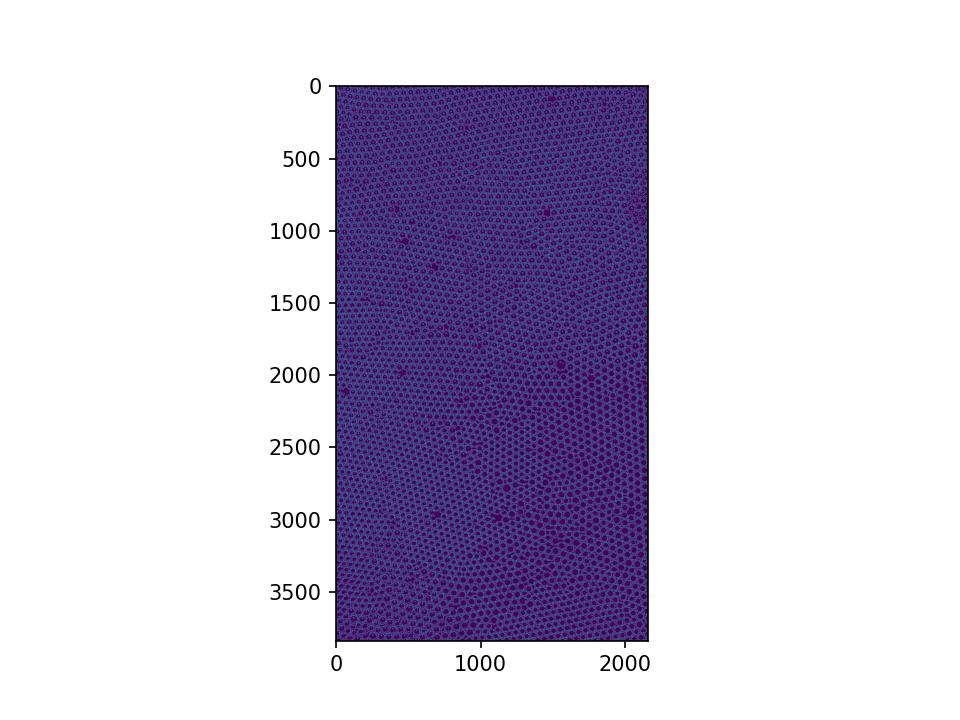

In [222]:
#Canny edge detection
max_lowThreshold = 300
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 2
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    #img_blur = cv2.blur(src_gray, (3,3))
    #detected_edges = cv2.Canny(src, low_threshold, low_threshold*ratio, kernel_size, L2gradient=True)
    detected_edges = cv2.Canny(src, 5, 10, kernel_size, L2gradient=True)
    mask = detected_edges != 0
    dst = src * (mask.astype(src.dtype))
    plt.figure(dpi=150)
    plt.imshow(detected_edges)

src=th
src_gray = th
#cv2.namedWindow(window_name)
#cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(1)
cv2.waitKey()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


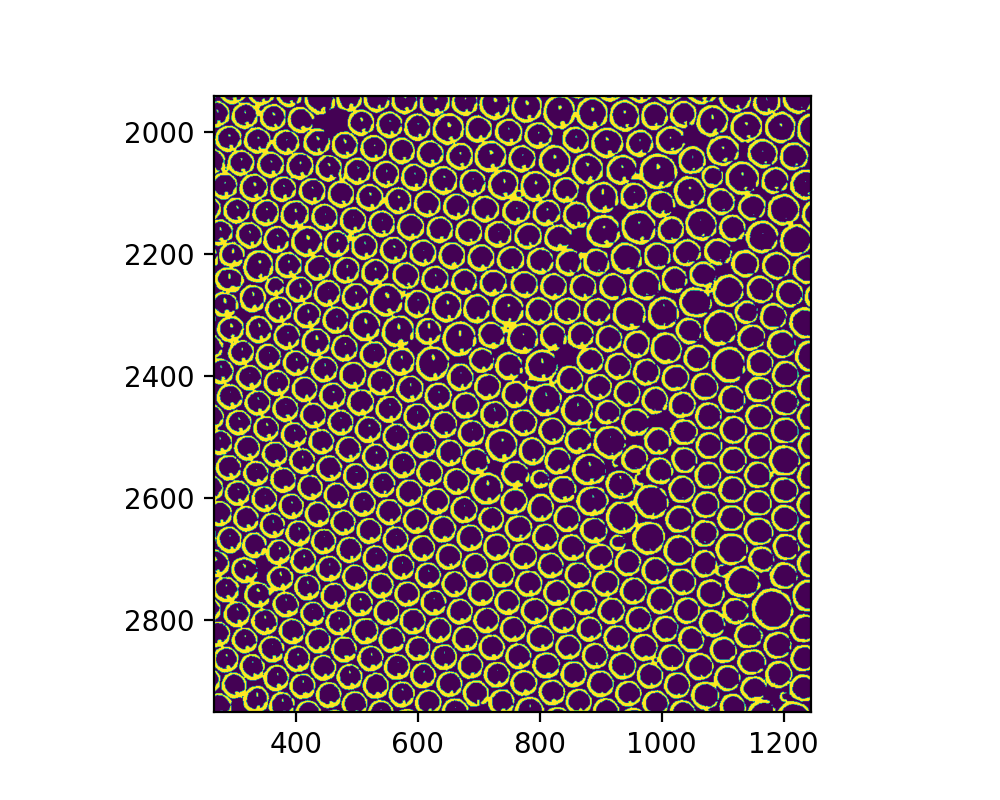

In [221]:
plt.figure(figsize=(5,4), dpi= 200)
th = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,-10)
plt.imshow(th)

In [229]:
circles1 = cv2.HoughCircles(th, cv2.HOUGH_GRADIENT, 0.00001, 36,param1=10 ,param2=12 ,minRadius=18 ,maxRadius=26 )
#circles1 = np.round(circles1[0, :]).astype("int")

circles1=circles1[0, :]#[:,0:2]

#circles2 = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.00001, 50,param1=50 ,param2=50 ,minRadius=26 ,maxRadius=40 )
#circles1 = np.round(circles1[0, :]).astype("int")

#circles2=circles2[0, :]#[:,0:2]

#circles3 = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.00001, 6,param1=30 ,param2=30 ,minRadius=3 ,maxRadius=15 )
#circles1 = np.round(circles1[0, :]).astype("int")

#circles3=circles3[0, :]#[:,0:2]

output1 = image.copy()

<IPython.core.display.Javascript object>


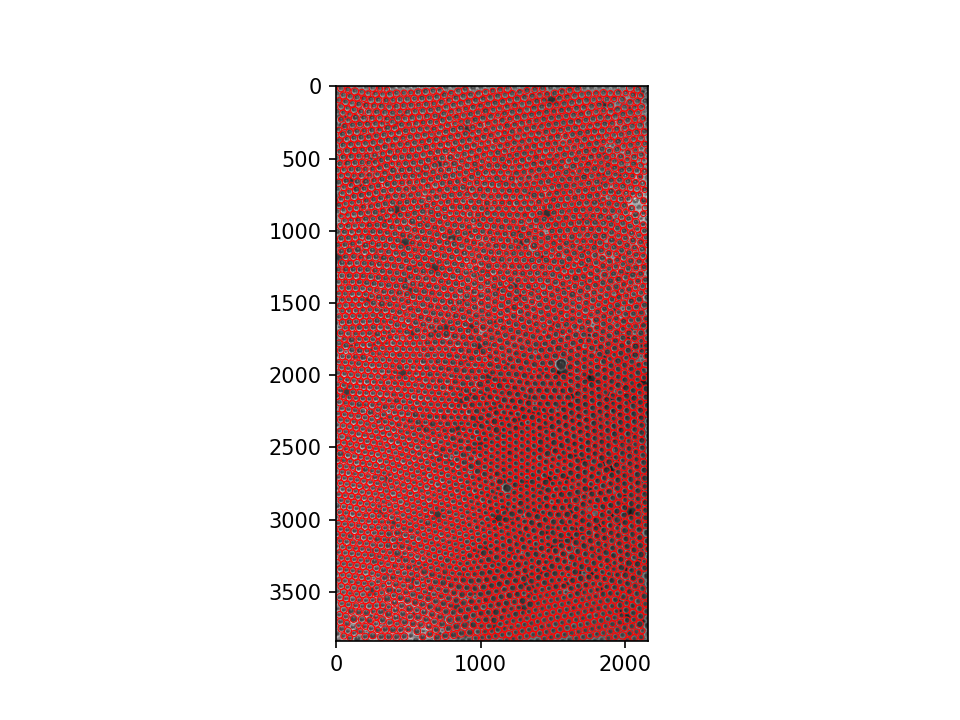

In [230]:
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
ax=fig.gca()
plt.ion()
plt.imshow(image)
for (x,y,r) in circles1:
    cc = plt.Circle(( x , y ), r ,fill=False,color='r',lw=0.5)
    #cc = plt.Circle(( x , y ), 1 ,fill=True,color='r',lw=0.5)
    ax.add_artist( cc )
    #cv2.circle(output1, (x, y), r,(0, 255, 0), 4)
    #cv2.rectangle(output1, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    
#for (x,y,r) in circles2:
    #cc = plt.Circle(( x , y ), r ,fill=False,color='g',lw=0.5)
    #cc = plt.Circle(( x , y ), 1 ,fill=True,color='g',lw=0.5)
    #ax.add_artist( cc )
#plt.savefig('detected_image/identify_circle1.png')

#for (x,y,r) in circles3:
    #cc = plt.Circle(( x , y ), r ,fill=False,color='b',lw=0.5)
    #cc = plt.Circle(( x , y ), 1 ,fill=True,color='g',lw=0.5)
    #ax.add_artist( cc )
plt.show()

<IPython.core.display.Javascript object>


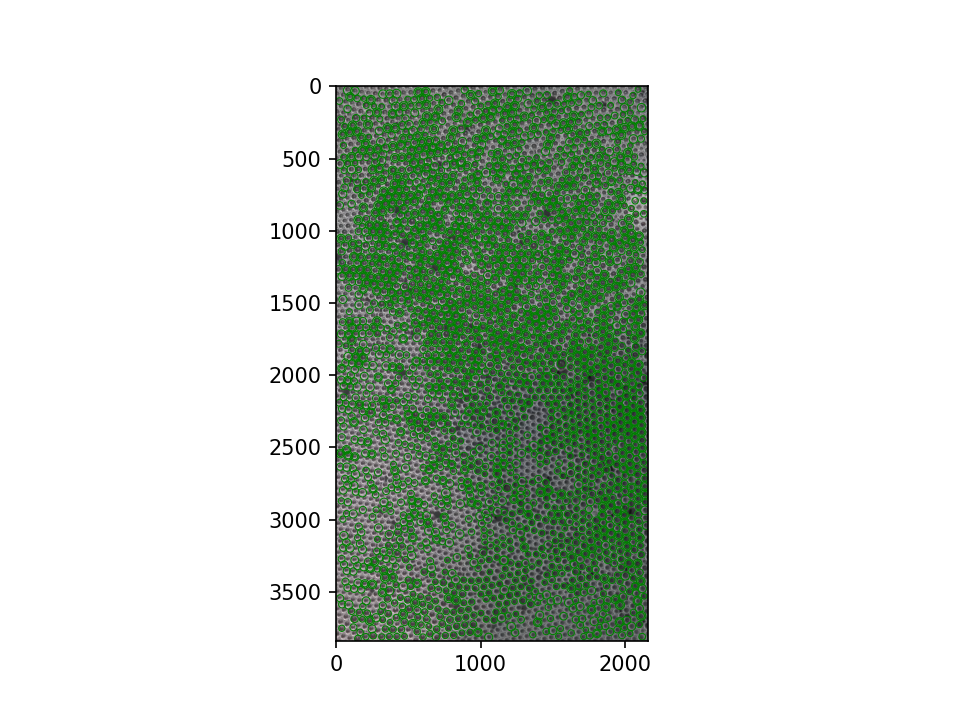

In [115]:
#for thresholded image
circles1 = cv2.HoughCircles(th, cv2.HOUGH_GRADIENT_ALT, 0.1, 36,param1=100 ,param2=0.01 ,minRadius=18,maxRadius=36 )
circles1=circles1[0, :]
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
ax=fig.gca()
plt.ion()
plt.imshow(output1)
for (x,y,r) in circles1:
    cc = plt.Circle(( x , y ), r ,fill=False,color='g',lw=0.5)
    #cc = plt.Circle(( x , y ), 1 ,fill=True,color='r',lw=0.5)
    ax.add_artist( cc )


plt.show()

In [7]:
#for thresholded image
circles1 = cv2.HoughCircles(th, cv2.HOUGH_GRADIENT, 0.00001, 36,param1=30 ,param2=10 ,minRadius=18 ,maxRadius=26 )
circles1=circles1[0, :]
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
ax=fig.gca()
plt.ion()
plt.imshow(output1)
for (x,y,r) in circles1:
    cc = plt.Circle(( x , y ), r ,fill=False,color='g',lw=0.5)
    #cc = plt.Circle(( x , y ), 1 ,fill=True,color='r',lw=0.5)
    ax.add_artist( cc )


plt.show()

NameError: name 'th' is not defined

In [82]:
def hc(r):
    circles1 = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.00001, 2*r,param1=50 ,param2=15 ,minRadius=r ,maxRadius=r+1 )
    #circles1 = np.round(circles1[0, :]).astype("int")
    
    circles1=circles1[0, :]#[:,0:2]
    return circles1


minr=18
maxr=30
for i in range(minr,maxr):
    if i==minr:
        circles2=hc(i)
    else:
        circles2=np.concatenate([circles2,hc(i)])
    print(circles2.shape)
#print(circles2.shape)
output1 = image.copy()

(970, 3)
(2227, 3)
(3517, 3)
(4730, 3)
(5766, 3)
(6509, 3)
(6970, 3)
(7313, 3)
(7504, 3)
(7605, 3)
(7661, 3)
(7675, 3)


In [83]:
print(circles3.shape)
print(circles2)

NameError: name 'circles3' is not defined

<IPython.core.display.Javascript object>


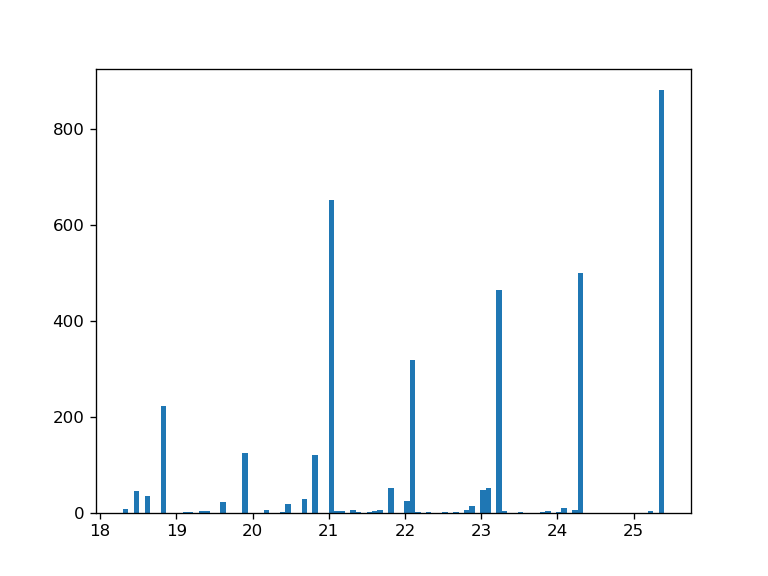

(array([  8.,   0.,  45.,   0.,  34.,   0.,   0., 222.,   0.,   0.,   0.,
          2.,   1.,   0.,   4.,   4.,   0.,   0.,  23.,   0.,   0.,   0.,
        125.,   0.,   0.,   0.,   6.,   0.,   0.,   2.,  19.,   0.,   0.,
         28.,   0., 120.,   0.,   0., 651.,   3.,   4.,   0.,   6.,   1.,
          0.,   1.,   3.,   6.,   0.,  51.,   0.,   0.,  25., 319.,   2.,
          0.,   1.,   0.,   0.,   2.,   0.,   1.,   0.,   5.,  14.,   0.,
         47.,  51.,   0., 463.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   3.,   0.,   2.,  10.,   0.,   5., 500.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
        880.]),
 array([18.3     , 18.370998, 18.442   , 18.512999, 18.584   , 18.654999,
        18.726   , 18.796999, 18.868   , 18.939   , 19.009998, 19.081   ,
        19.151999, 19.223   , 19.293999, 19.365   , 19.435999, 19.507   ,
        19.578   , 19.649   , 19.72    , 19.790998, 19.862   , 19.932999,
        20.004   , 20.

In [85]:
#plt.plot(range(circles1[:,2].size),circles1[:,2])
plt.figure()
plt.hist(circles1[:,2],bins=100)
#fig=plt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')

# ssm

In [87]:
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread
img1=imread('frame200.jpg')
img2=imread('frame300.jpg')
img3=imread('frame100.jpg')
print(np.shape(img1))
print(ssim(img1,img3,channel_axis=2),ssim(img2,img3,channel_axis=2))

FileNotFoundError: No such file: 'C:\Users\huzai\Downloads\frame200.jpg'

In [150]:
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread
path = "data/frame"
maxframeno=10000
fs=[]
ss=[]
unique=[]
for frameno in range(30,maxframeno,30):
    file=path+str(frameno)+".png"
    if frameno==0:
        oldframe=imread(file)
    else:
        newframe=imread(file)
        s=ssim(oldframe,newframe,channel_axis=2)
        ss.append(s)
        if s<0.7:
            unique.append(frameno)
        fs.append(frameno)
        oldframe=newframe
    print(frameno)


NameError: name 'oldframe' is not defined

<IPython.core.display.Javascript object>


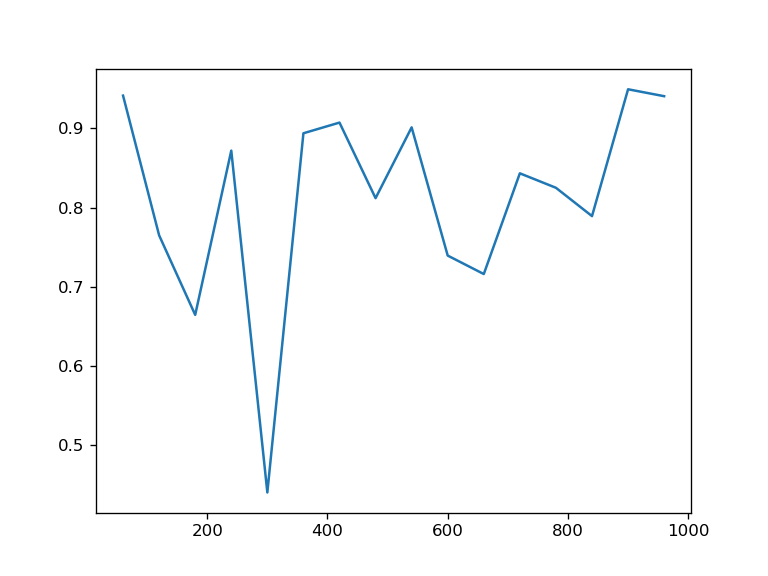

In [ ]:
plt.figure()
plt.plot(fs,ss)

In [ ]:
coords1=circles1[:,:-1]
g_r1, radii1 = rdf(coords1, dr=1)

radii1=radii1/radii1[g_r1.argmax()]
#print(radii)

<IPython.core.display.Javascript object>


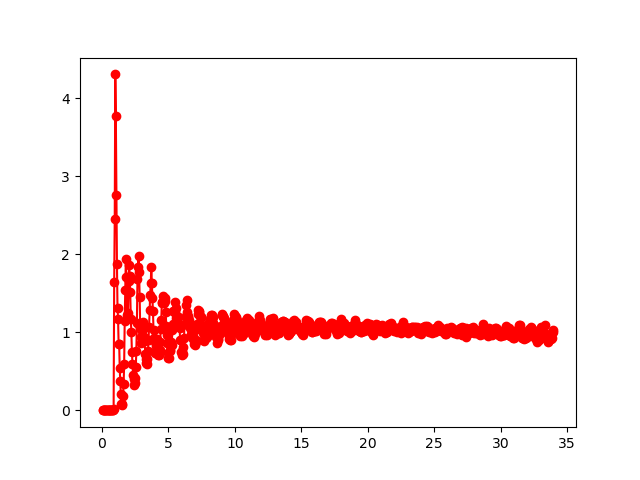

In [ ]:
plt.figure()
plt.plot(radii1,g_r1,"ro-",label='image 1')
fig.set_figheight(100)
fig.set_figwidth(100)

plt.show()

<IPython.core.display.Javascript object>


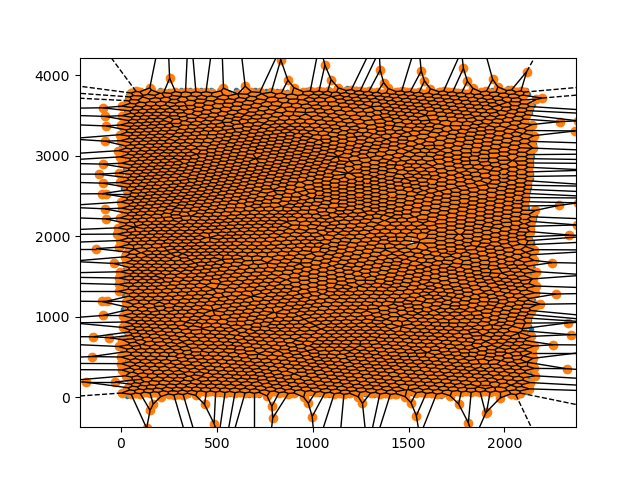

In [231]:
coords1=circles1[:,:-1]
vor1 = Voronoi(coords1)
fig1 = voronoi_plot_2d(vor1)
plt.show()

<IPython.core.display.Javascript object>


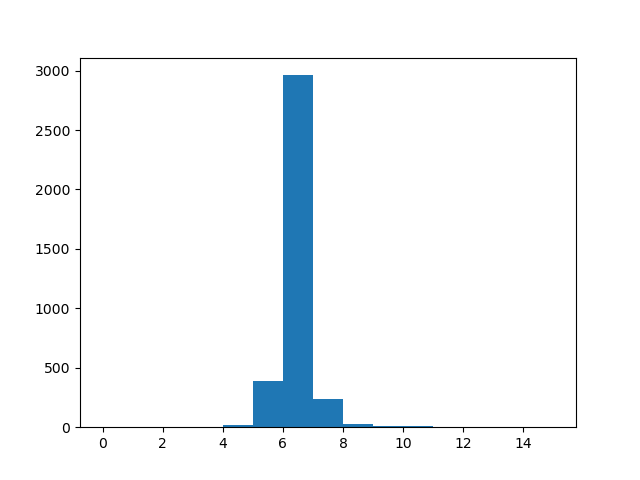

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.200e+01, 3.870e+02,
        2.961e+03, 2.400e+02, 2.300e+01, 9.000e+00, 6.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <BarContainer object of 15 artists>)

In [252]:
lengths=[]
indices=[]
for i in vor1.regions:
    lengths.append(len(i))
    if len(i)==5:
        indices.append(i)
lengths=np.array(lengths)
plt.figure()
plt.hist(lengths,bins=range(0,16))

<IPython.core.display.Javascript object>


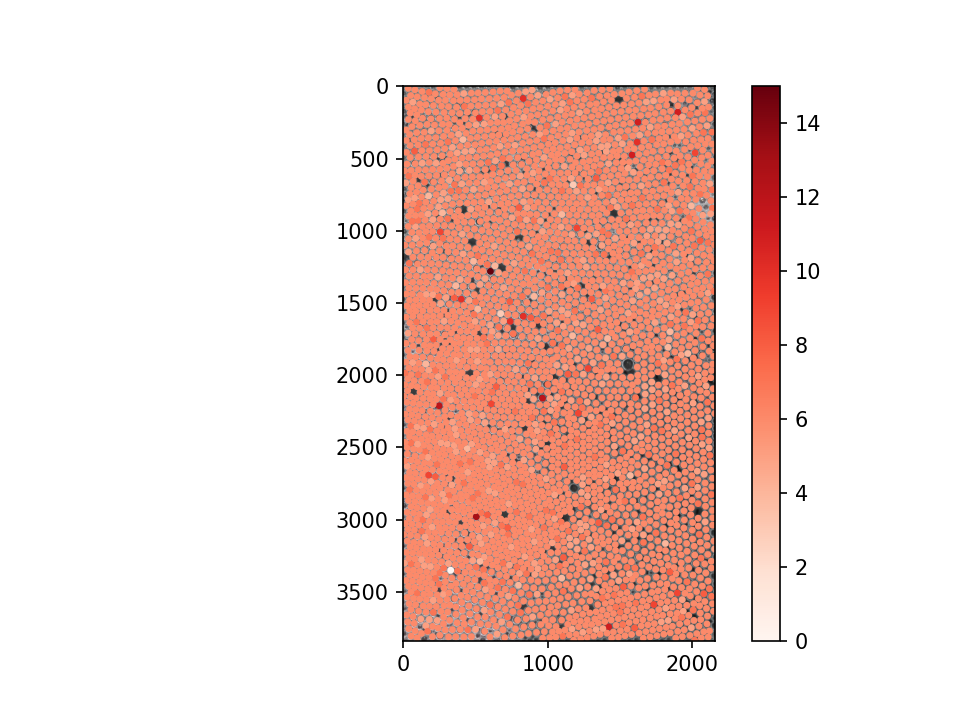

In [264]:
plt.figure(dpi=150)
plt.imshow(image)
plt.scatter(vor1.points[reg[reg!=-1]-1][:,0],vor1.points[reg[reg!=-1]-1][:,1],s=5,c=lengths[reg[reg!=-1]-1],cmap='Reds')
plt.colorbar()
#plt.plot(vor1.vertices[np.array(indices)][:,:,0],vor1.vertices[np.array(indices)][:,:,1],'or')

In [250]:
reg=np.array(vor1.point_region)
vor1.points[reg[reg!=-1]-1]

(3658, 2)

In [65]:
#list1=list(vor.ridge_points[:,0])+list(vor.ridge_points[:,0])
nos1=[]
for i in vor1.regions:
    nos1.append(len(i))
nn1=Counter(nos1)
od1 = OrderedDict(sorted(nn1.items()))

In [66]:
plt.plot(od1.keys(),od1.values(),linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


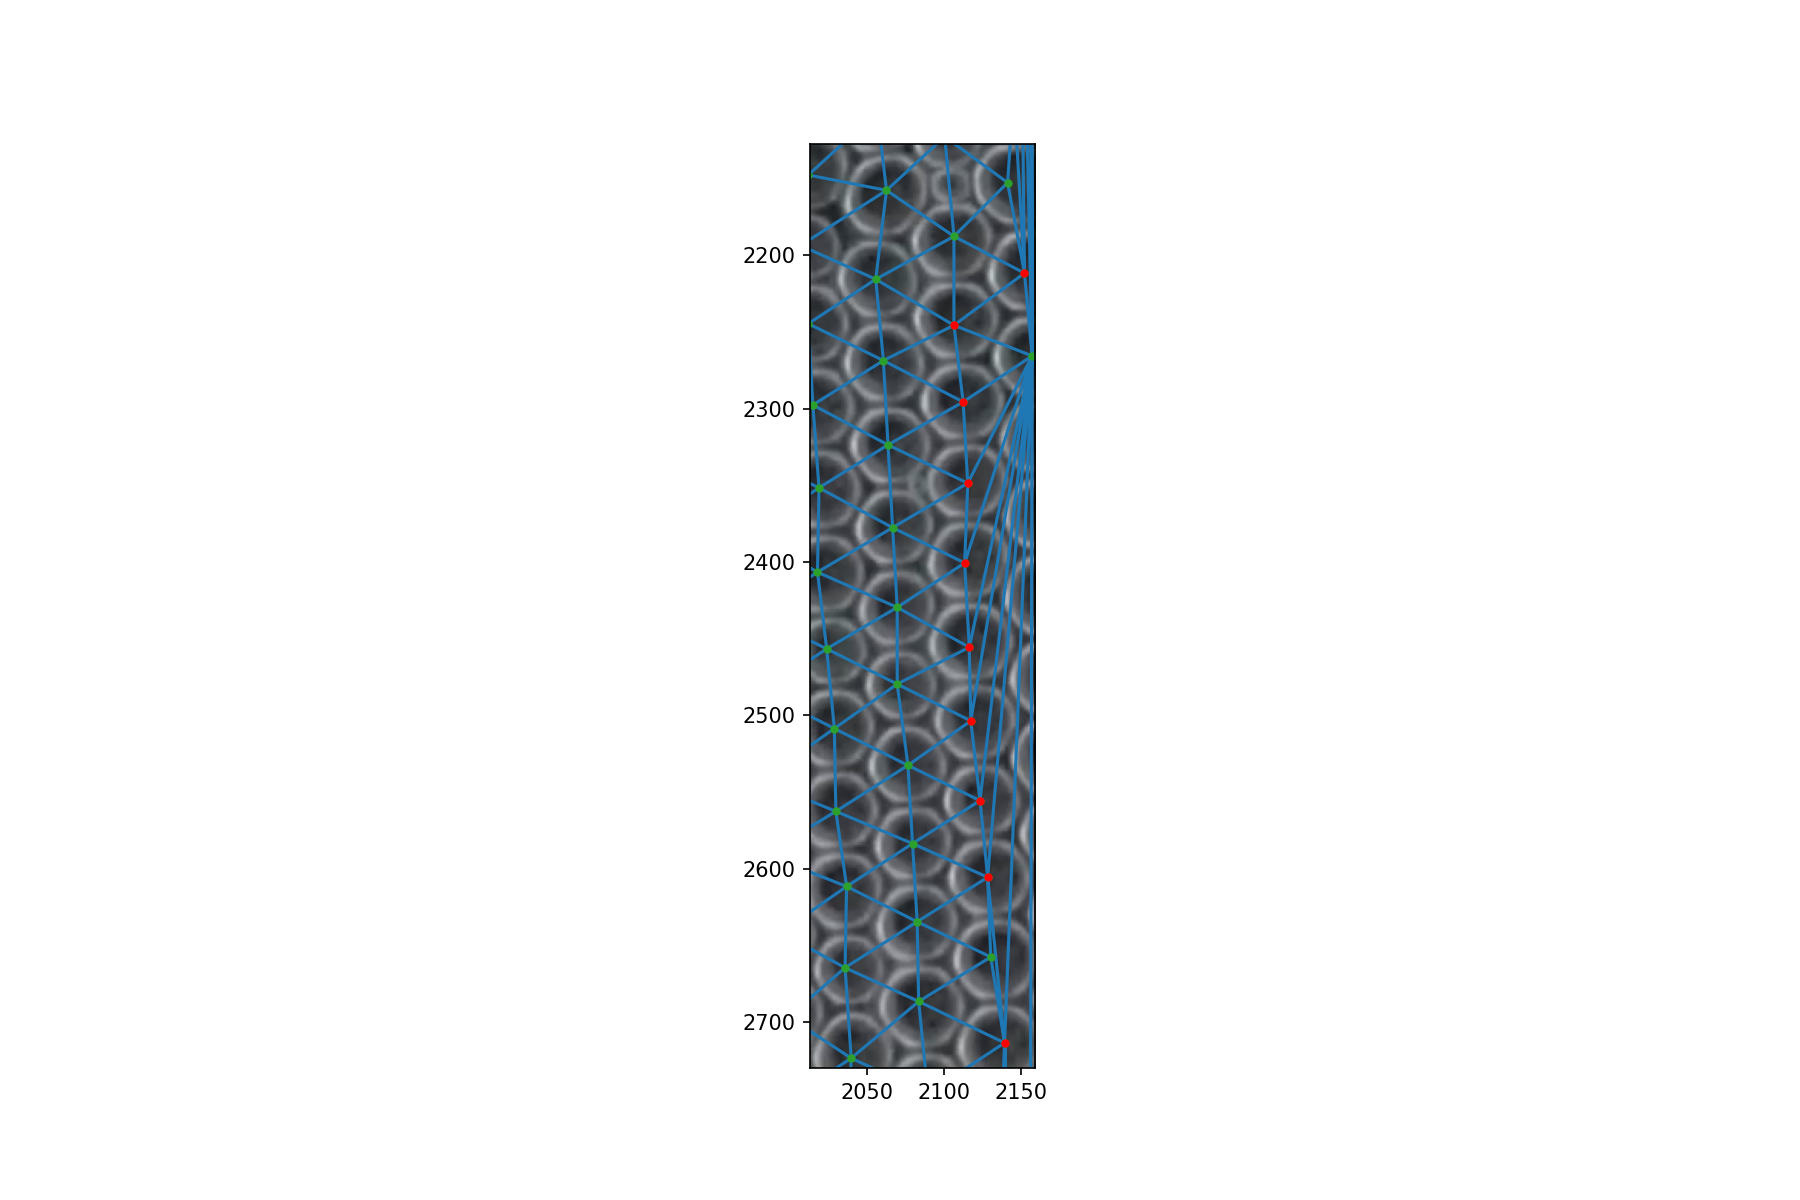

In [304]:
fig=plt.figure(figsize=(12,8), dpi= 150, facecolor='w', edgecolor='k')
coords1=circles1[:,:2]
tri1 = Delaunay(coords1)
plt.imshow(image)
plt.triplot(coords1[:,0], coords1[:,1], tri1.simplices)
plt.plot(coords1[:,0], coords1[:,1], '.')
plt.plot(pts[:,0],pts[:,1],'r.')
#plt.savefig('triplot1.png')
plt.show()

In [308]:
xs=(tri1.vertex_neighbor_vertices[0][1:]-tri1.vertex_neighbor_vertices[0][:-1])
idx=np.where(xs==9)[0][0]
indices=tri1.vertex_neighbor_vertices[0][idx:idx+2]
pts=tri1.points[tri1.vertex_neighbor_vertices[1][indices[0]:indices[1]]]
plt.plot(pts[:,0],pts[:,1],'r.')

In [31]:
centroids=coords1
psi_T = 1j*np.zeros(len(centroids))
a = 170
G = ((4*np.pi/(a*np.sqrt(3)))* np.array([0.5*np.sqrt(3),0.5])) +((4*np.pi/(a*np.sqrt(3)))* np.array([0,1]))
neighbors = np.empty(len(centroids),dtype=object)
for i in range(len(centroids)):
    count=0
    for j in tri1.simplices:
        if i in j:
            count+=1
            p1 = centroids[i]
            p2 = centroids[j[j!=i][0]]
            p3 = centroids[j[j!=i][1]]
            theta = np.arccos(np.dot(p2-p1,p3-p1)/np.sqrt(np.dot(p2-p1,p2-p1)*np.dot(p3-p1,p3-p1)))
            psi_T[i]=psi_T[i]+np.exp(1j*6*theta)
    psi_T[i]=psi_T[i]/count
"""
    if i in j:
        count+=1
        p1 = centroids[i]
        p2 = centroids[j[j!=i][0]]
        p3 = centroids[j[j!=i][1]]
        #theta =
#psi_T[i] = np.exp(1j*np.dot(G,centroids[i]))
#here r_i is the position vector from origin
#taking it to be the nearest neighbor vector,
psi_T[i] = np.exp(1j*np.dot(G,p2-p1))
""" 
print(np.abs(np.mean(psi_T)))

0.7586458059738747


In [ ]:
import cv2
import numpy as np

img = cv2.imread('20220608_151134.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
 
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

#cv2.imwrite('houghlines3.jpg',img)
cv2.imshow("Result Image", img)

<IPython.core.display.Javascript object>


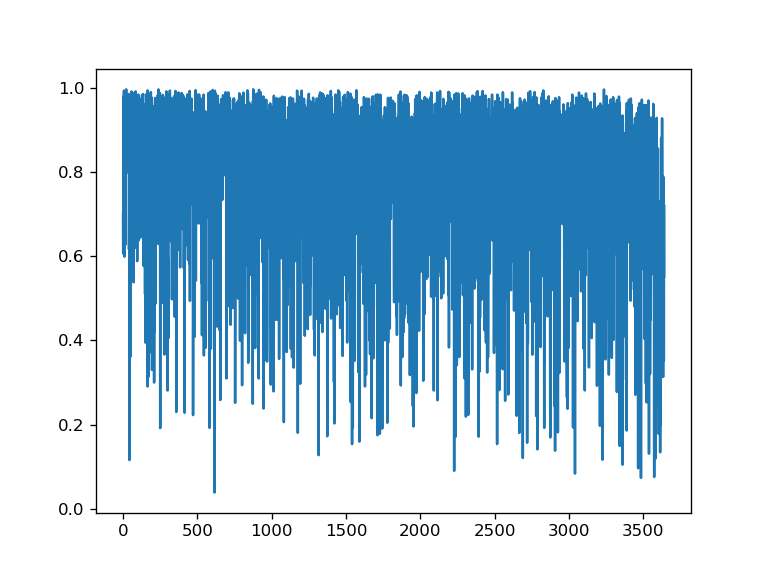

In [35]:
plt.figure()
plt.plot(range(len(psi_T)),np.abs(psi_T))

<IPython.core.display.Javascript object>


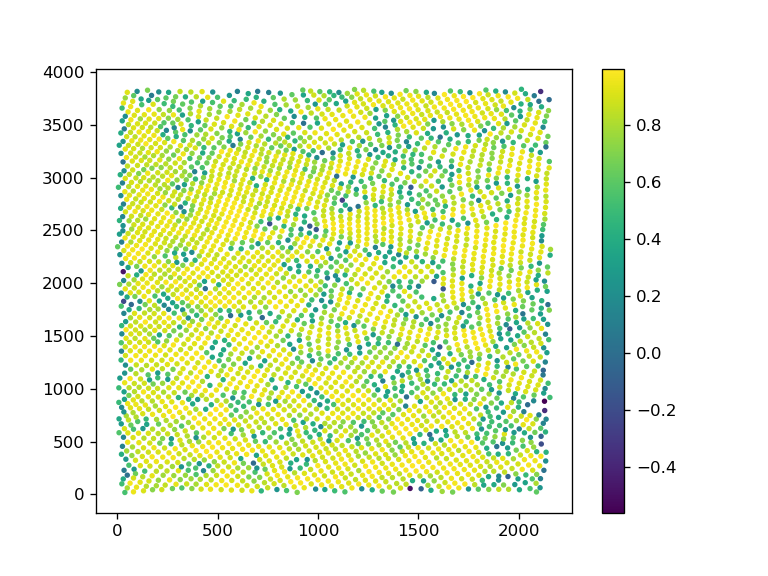

In [47]:
plt.figure()
#xx,yy=np.meshgrid(centroids[:,0],centroids[:,1])
plt.scatter(centroids[:,0],centroids[:,1],s=5,c=psi_T)
plt.colorbar()

In [41]:
centroids

array([[ 907.5, 1509.5],
       [1386.5,  931.5],
       [2100.5, 3616.5],
       ...,
       [   9.5, 3305.5],
       [ 924.5, 3828.5],
       [   7.5,  870.5]], dtype=float32)

In [275]:
from scipy.spatial import KDTree
kdtree=KDTree(circles1)
dist, regions = kdtree.query([[0.5,0.5],[1,1]], k=1)

ValueError: x must consist of vectors of length 3 but has shape (2, 2)

In [269]:
dist

array([0., 0., 0., ..., 0., 0., 0.])